In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import sys
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path

import celltypist
from celltypist import models

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(|dpi=80, color_map='viridis')
#sc.logging.print_versions()

In [2]:
input_file = '/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_final_integ_LN_scVI_without_tu_stroma_laryer10.h5ad'
adata = sc.read_h5ad(input_file)

In [4]:
adata = adata.raw.to_adata()

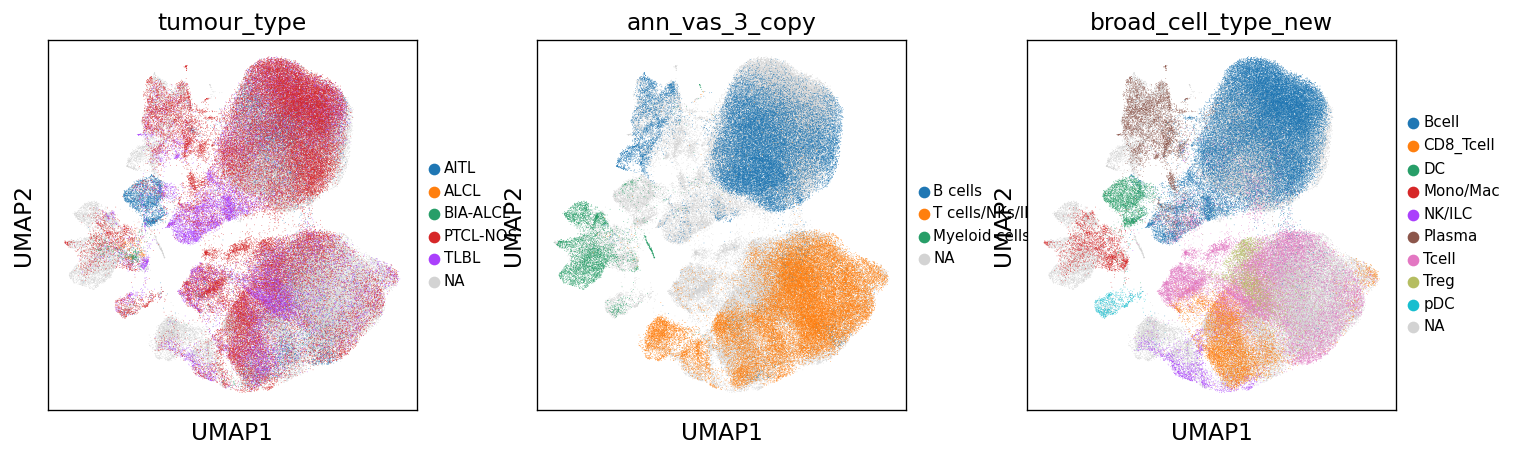

In [11]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pl.umap(adata, color = ['tumour_type','ann_vas_3_copy','broad_cell_type_new'], legend_fontsize=9)

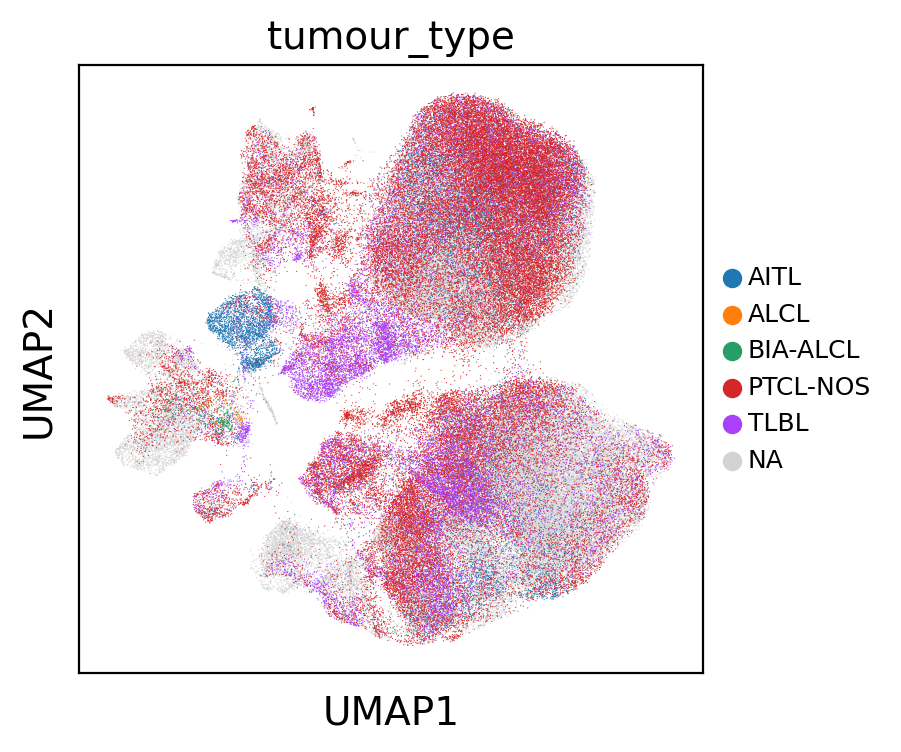

In [4]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color = ['tumour_type'], legend_fontsize=9)

In [49]:
sc.tl.embedding_density(adata, basis='umap', groupby='batch')

computing density on 'umap'
--> added
    'umap_density_batch', densities (adata.obs)
    'umap_density_batch_params', parameter (adata.uns)


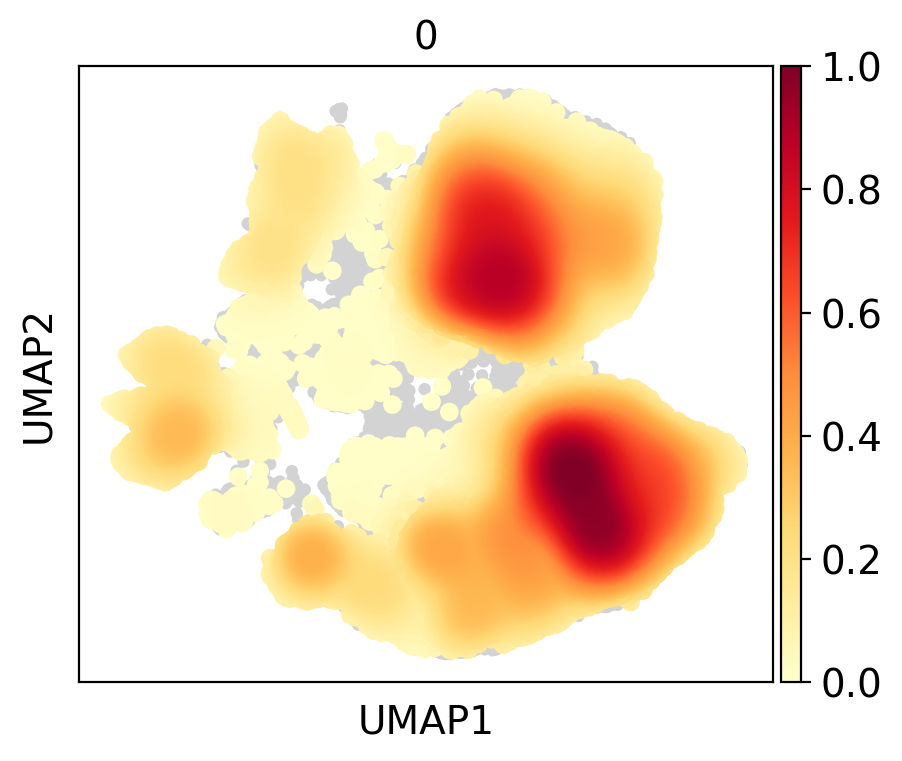

In [51]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.embedding_density(
    adata, basis='umap', key='umap_density_batch',group='0')

In [13]:
adata

AnnData object with n_obs × n_vars = 177171 × 25610
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ID', 'sample_id', 'donor_id', 'tumour_type', 'site', 'type', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'broad_cell_type_new', 'n_genes', 'percent_mito', 'n_counts', 'stud

In [8]:
import celltypist
from celltypist import models

In [9]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 44
📂 Storing models in /home/jovyan/.celltypist/data/models
💾 Downloading model [1/44]: Immune_All_Low.pkl
💾 Downloading model [2/44]: Immune_All_High.pkl
💾 Downloading model [3/44]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [4/44]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [5/44]: Adult_Human_Skin.pkl
💾 Downloading model [6/44]: Adult_Mouse_Gut.pkl
💾 Downloading model [7/44]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [8/44]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [9/44]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [10/44]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [11/44]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [12/44]: COVID19_Immune_Landscape.pkl
💾 Downloading model [13/44]: Cells_Fetal_Lung.pkl
💾 Downloading model [14/44]: Cells_Intestinal_Tract.pkl
💾 Downloading model [15/44]: Cells_Lung_Airway.pk

In [10]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


model  \
0                        Immune_All_Low.pkl   
1                       Immune_All_High.pkl   
2   Adult_CynomolgusMacaque_Hippocampus.pkl   
3           Adult_Human_PancreaticIslet.pkl   
4                      Adult_Human_Skin.pkl   
5                       Adult_Mouse_Gut.pkl   
6             Adult_Mouse_OlfactoryBulb.pkl   
7                 Adult_Pig_Hippocampus.pkl   
8       Adult_RhesusMacaque_Hippocampus.pkl   
9                  Autopsy_COVID19_Lung.pkl   
10         COVID19_HumanChallenge_Blood.pkl   
11             COVID19_Immune_Landscape.pkl   
12                     Cells_Fetal_Lung.pkl   
13               Cells_Intestinal_Tract.pkl   
14                    Cells_Lung_Airway.pkl   
15               Developing_Human_Brain.pkl   
16              Developing_Human_Gonads.pkl   
17         Developing_Human_Hippocampus.pkl   
18              Developing_Human_Organs.pkl   
19              Developing_Human_Thymus.pkl   
20               Developing_Mouse_Brain.pkl   
21         Developing_Mouse_Hippocampus.pkl   
22            Fetal_Human_AdrenalGlands.pkl   
23                 Fetal_Human_Pancreas.pkl   
24                Fetal_Human_Pituitary.pkl   
25                   Fetal_Human_Retina.pkl   
26                     Fetal_Human_Skin.pkl   
27                  Healthy_Adult_Heart.pkl   
28                 Healthy_COVID19_PBMC.pkl   
29                  Healthy_Human_Liver.pkl   
30                  Healthy_Mouse_Liver.pkl   
31          Human_AdultAged_Hippocampus.pkl   
32           Human_Developmental_Retina.pkl   
33              Human_Embryonic_YolkSac.pkl   
34                       Human_IPF_Lung.pkl   
35       Human_Longitudinal_Hippocampus.pkl   
36                     Human_Lung_Atlas.pkl   
37                        Human_PF_Lung.pkl   
38                  Lethal_COVID19_Lung.pkl   
39                  Mouse_Dentate_Gyrus.pkl   
40          Mouse_Isocortex_Hippocampus.pkl   
41         Mouse_Postnatal_DentateGyrus.pkl   
42                   Nuclei_Lung_Airway.pkl   
43                      Pan_Fetal_Human.pkl   

                                          description  
0   immune sub-populations combined from 20 tissue...  
1   immune populations combined from 20 tissues of...  
2   cell types from the hippocampus of adult cynom...  
3   cell types from pancreatic islets of healthy a...  
4            cell types from human healthy adult skin  
5   cell types in the adult mouse gut combined fro...  
6    cell types from the olfactory bulb of adult mice  
7           cell types from the adult pig hippocampus  
8   cell types from the hippocampus of adult rhesu...  
9   cell types from the lungs of 16 SARS-CoV-2 inf...  
10  detailed blood cell states from 16 individuals...  
11  immune subtypes from lung and blood of COVID-1...  
12    cell types from human embryonic and fetal lungs  
13  intestinal cells from fetal, pediatric (health...  
14  cell populations from scRNA-seq of five locati...  
15  cell types from the first-trimester developing...  
16  cell types of human gonadal and adjacent extra...  
17   cell types from the developing human hippocampus  
18  cell types of five endoderm-derived organs in ...  
19  cell populations in embryonic, fetal, pediatri...  
20  cell types from the embryonic mouse brain betw...  
21  cell types from the mouse hippocampus at postn...  
22  cell types of human fetal adrenal glands from ...  
23  pancreatic cell types from human embryos at 9-...  
24  cell types of human fetal pituitaries from 7 t...  
25  cell types from human fetal neural retina and ...  
26        cell types from developing human fetal skin  
27  cell types from eight anatomical regions of th...  
28  peripheral blood mononuclear cell types from h...  
29  cell types from scRNA-seq and snRNA-seq of the...  
30  cell types from scRNA-seq and snRNA-seq of the...  
31  cell types from the hippocampus of adult and a...  
32                 cell types from human fetal retina  
33  cell types of 

In [130]:
model = models.Model.load(model = 'Immune_All_Low.pkl')

In [131]:
predictions = celltypist.annotate(adata, model = model, majority_voting = True)

🔬 Input data has 177171 cells and 25610 genes
🔗 Matching reference genes in the model
🧬 5896 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 25


running Leiden clustering
    finished: found 536 clusters and added
    'over_clustering', the cluster labels (adata.obs, categorical) (0:03:22)


🗳️ Majority voting the predictions
✅ Majority voting done!


In [140]:
adata = predictions.to_adata()

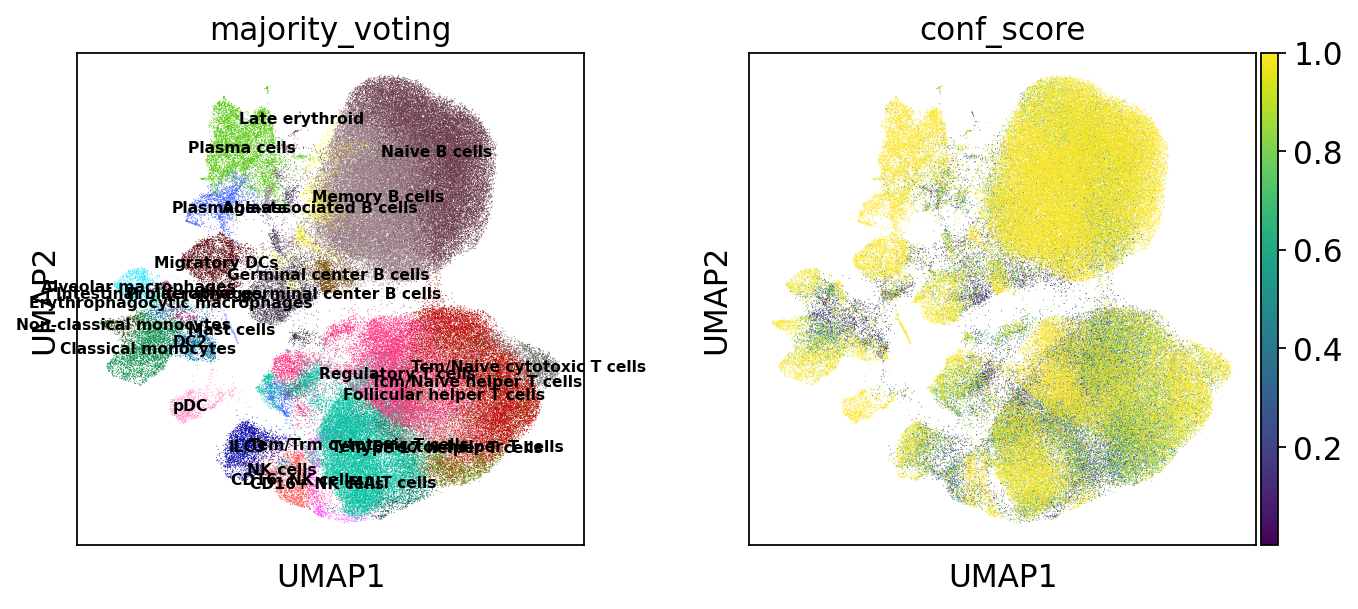

In [141]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.umap(adata, color = ['majority_voting','conf_score'], legend_loc = 'on data', legend_fontsize=7)

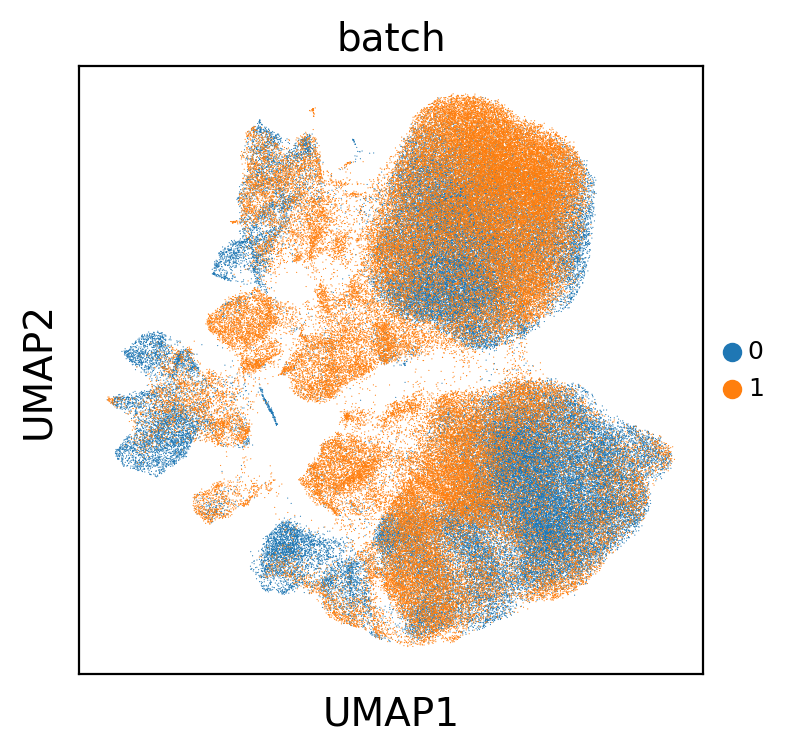

In [129]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color = ['batch'], legend_fontsize=9)

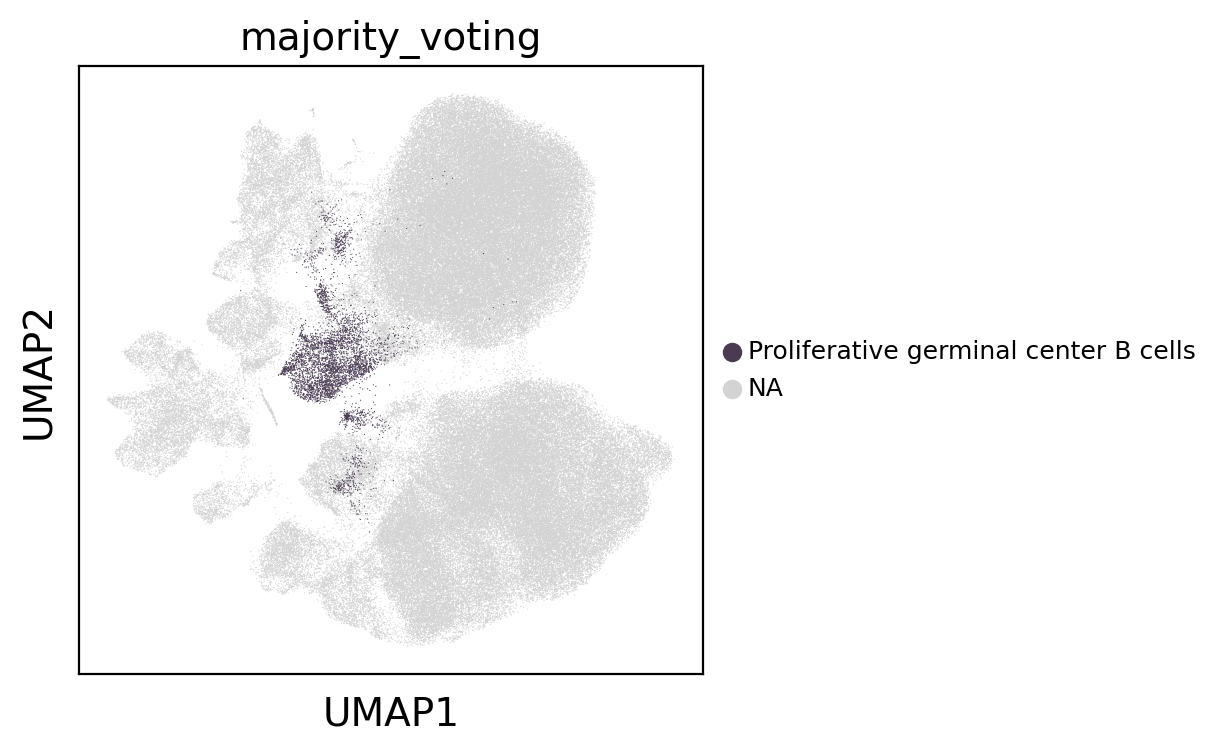

In [15]:
sc.pl.umap(adata, color = ['majority_voting'], legend_fontsize=9, groups=['Proliferative germinal center B cells'])

In [56]:
save_file = '/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_final_integ_LN_scVI_without_tu_stroma_laryer10_celltypist_panImm_low.h5ad'
adata.write(save_file)

In [2]:
input_file = '/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_final_integ_LN_scVI_without_tu_stroma_laryer10_celltypist_panImm_low.h5ad'
adata = sc.read_h5ad(input_file)

In [12]:
sc.tl.leiden(adata, resolution=1.0, key_added="leiden_1.0")

running Leiden clustering
    finished: found 29 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:03:17)


In [11]:
adata.uns['log1p']["base"] = None

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:11:27)


/home/jovyan/my-conda-envs/dandelion/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perf

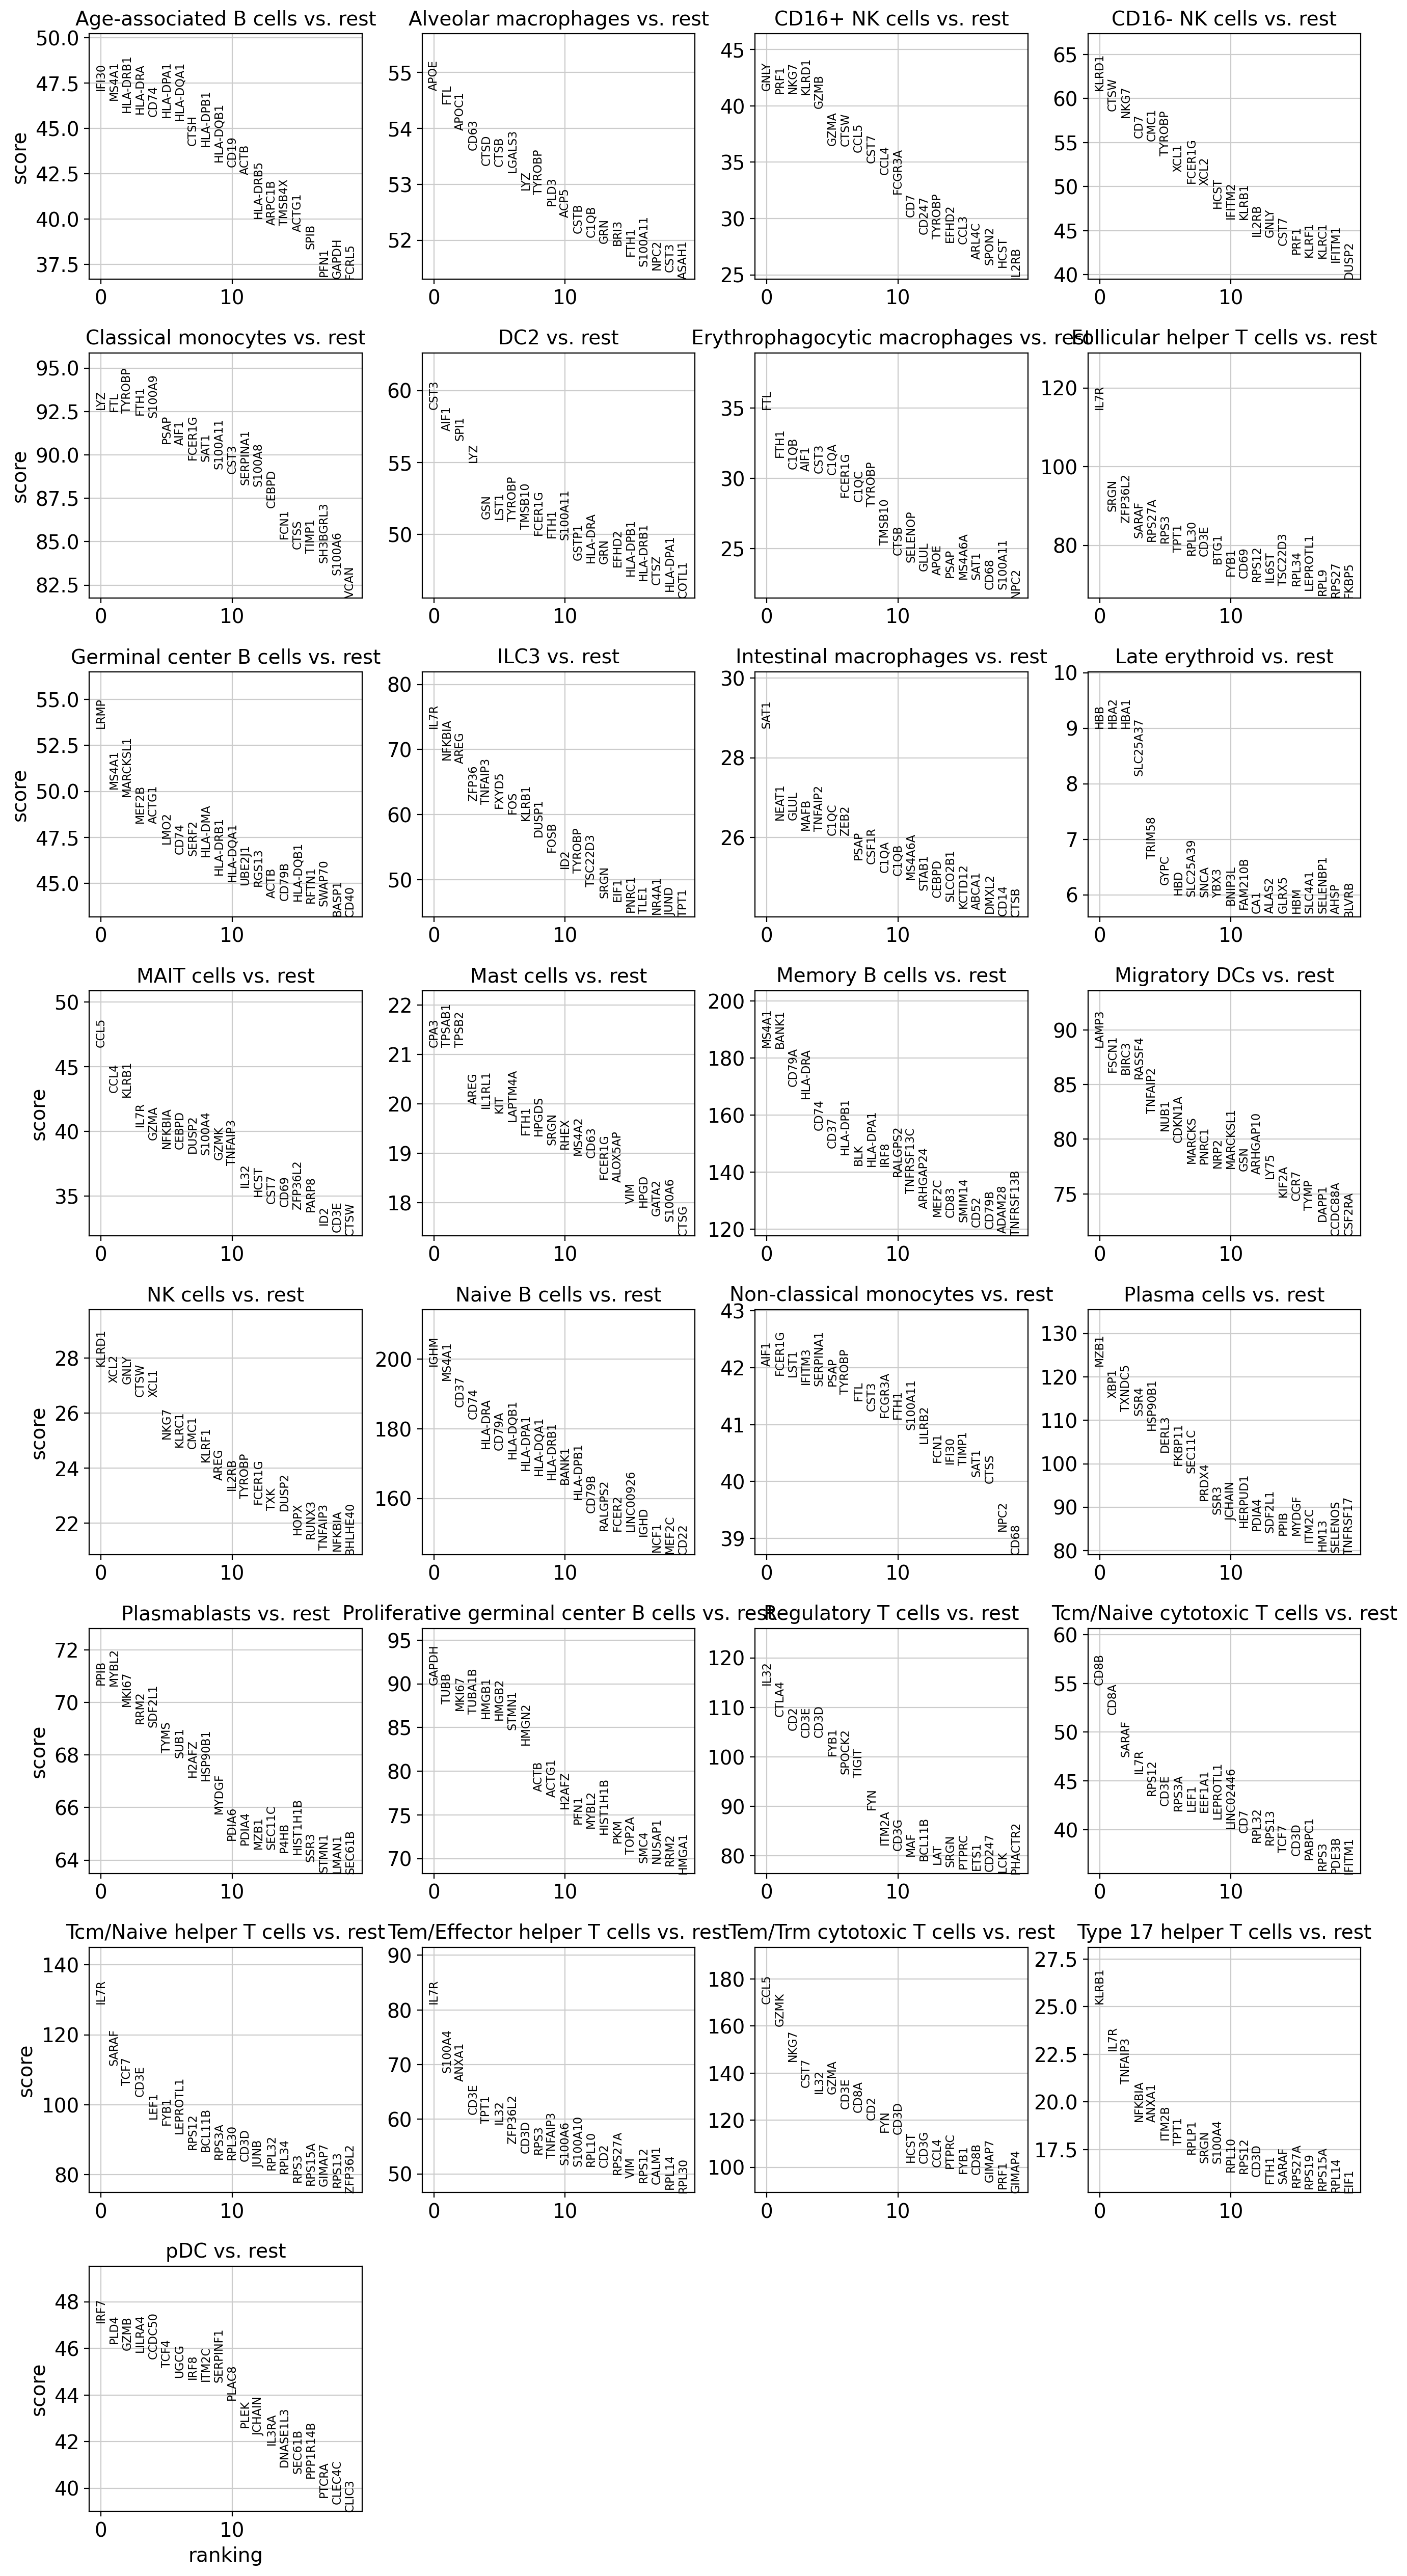

In [12]:
sc.tl.rank_genes_groups(adata, 'majority_voting', method = 'wilcoxon', n_genes = 200)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})

In [47]:
#adata[adata.obs['majority_voting']=='Proliferative germinal center B cells'].obs['donor'].value_counts()
adata.obs['majority_voting'].value_counts()

Memory B cells                           39775
Naive B cells                            30994
Tem/Trm cytotoxic T cells                20698
Tcm/Naive helper T cells                 19131
Regulatory T cells                       16943
Follicular helper T cells                 7929
Plasma cells                              6001
Proliferative germinal center B cells     4783
Tem/Effector helper T cells               4205
Classical monocytes                       3386
Migratory DCs                             3175
ILC3                                      2807
Plasmablasts                              2383
Tcm/Naive cytotoxic T cells               2017
CD16- NK cells                            1726
Age-associated B cells                    1674
DC2                                       1660
Germinal center B cells                   1494
MAIT cells                                1229
Alveolar macrophages                      1029
pDC                                        936
CD16+ NK cell

In [20]:
markers.to_csv('DEGs_celltypes_LN.csv')

In [49]:
categories_order = ['Naive B cells','Memory B cells','Age-associated B cells','Germinal center B cells',
                    'Proliferative germinal center B cells','Plasmablasts','Plasma cells',
                    'Tcm/Naive helper T cells','Tem/Effector helper T cells','Type 17 helper T cells','Follicular helper T cells','Regulatory T cells',
                    'Tcm/Naive cytotoxic T cells','Tem/Trm cytotoxic T cells','MAIT cells','NK cells','CD16+ NK cells','CD16- NK cells',
                    'ILC3','Classical monocytes','Non-classical monocytes','Alveolar macrophages','Erythrophagocytic macrophages','Intestinal macrophages',
                    'DC2','Migratory DCs','pDC','Mast cells','Late erythroid']

In [83]:
adata

AnnData object with n_obs × n_vars = 177171 × 25610
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ID', 'sample_id', 'donor_id', 'tumour_type', 'site', 'type', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'broad_cell_type_new', 'n_genes', 'percent_mito', 'n_counts', 'stud

In [127]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
#genes = ['CD3D','CD3G','CD8A','FOXP3','IL2RA','SLC4A10','TRAV1-2',
#         'NKG7',
#         'CD79A','MS4A1','LRMP','MARCKSL1','MEF2B']
genes = {
    'B cells':['CD79A','MS4A1','FCRL1','TNFRSF13B','LRMP','MEF2B','BCL6','LMO2','AICDA','MKI67','TOP2A','IGHG1','IGHG2'],
    'T cells':['CD3D','CD3G','LEF1','KLRB1','FOXP3','IL2RA','CD8A','CD8B','GZMK','GZMA','SLC4A10','TRAV1-2'],
    'NKs':['NKG7','GNLY','FCGR3A','XCL1','XCL2','KIT','IL1R1'],
    'Mono/Mac':['CD68','CD14','C1QB','CD5L','LYVE1'],
    'DC/pDC':['CLEC10A','LAMP3','IDO1','LILRA4','CLEC4C'],
    'Other':['TPSAB1','TPSB2','HBB']
}
#sc.tl.dendrogram(adata, groupby='majority_voting')

dp = sc.pl.dotplot(adata, var_names=genes, groupby='majority_voting',dendrogram=False,
                   var_group_rotation=0, swap_axes=False,standard_scale = 'var',
                   return_fig=True, categories_order=categories_order)
dp.style(cmap='Blues',color_on='square',dot_edge_color=None,dot_edge_lw=1).show()
#dp.savefig('/home/jovyan/farm/T-cell_lym/script/figures/DEGs_LN_celltypes.pdf')

ERROR: Please check that the categories given by the `order` parameter match the categories that want to be reordered.

Mismatch: {'Macrophages', 'DC', 'Monocytes', 'B cells', 'ILC', 'T cells', 'Erythroid'}

Given order categories: ['Naive B cells', 'Memory B cells', 'Age-associated B cells', 'Germinal center B cells', 'Proliferative germinal center B cells', 'Plasmablasts', 'Plasma cells', 'Tcm/Naive helper T cells', 'Tem/Effector helper T cells', 'Type 17 helper T cells', 'Follicular helper T cells', 'Regulatory T cells', 'Tcm/Naive cytotoxic T cells', 'Tem/Trm cytotoxic T cells', 'MAIT cells', 'NK cells', 'CD16+ NK cells', 'CD16- NK cells', 'ILC3', 'Classical monocytes', 'Non-classical monocytes', 'Alveolar macrophages', 'Erythrophagocytic macrophages', 'Intestinal macrophages', 'DC2', 'Migratory DCs', 'pDC', 'Mast cells', 'Late erythroid']

majority_voting categories: ['B cells', 'DC', 'Erythroid', 'ILC', 'Macrophages', 'Mast cells', 'Monocytes', 'Plasma cells', 'T cells', 'pDC']



AttributeError: 'DotPlot' object has no attribute 'group_extra_size'

In [124]:
adata

AnnData object with n_obs × n_vars = 177171 × 25610
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ID', 'sample_id', 'donor_id', 'tumour_type', 'site', 'type', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'broad_cell_type_new', 'n_genes', 'percent_mito', 'n_counts', 'stud

In [160]:
adata_sub = adata_sub[~adata_sub.obs['donor'].isin(['TL_KLT','TL_SJH03'])].copy() ### filter donors <20 cells

In [163]:
categories_order = ['A34','A56','A59','A60','A61','TSP2','TSP7','TSP14',
                    'TL2860','TL3291','TL4528','TL5493','TL5521','TL5737',
                    'TL5968','TL6042','TL6678','TL6682','TL6722','TL8441','TL10712']

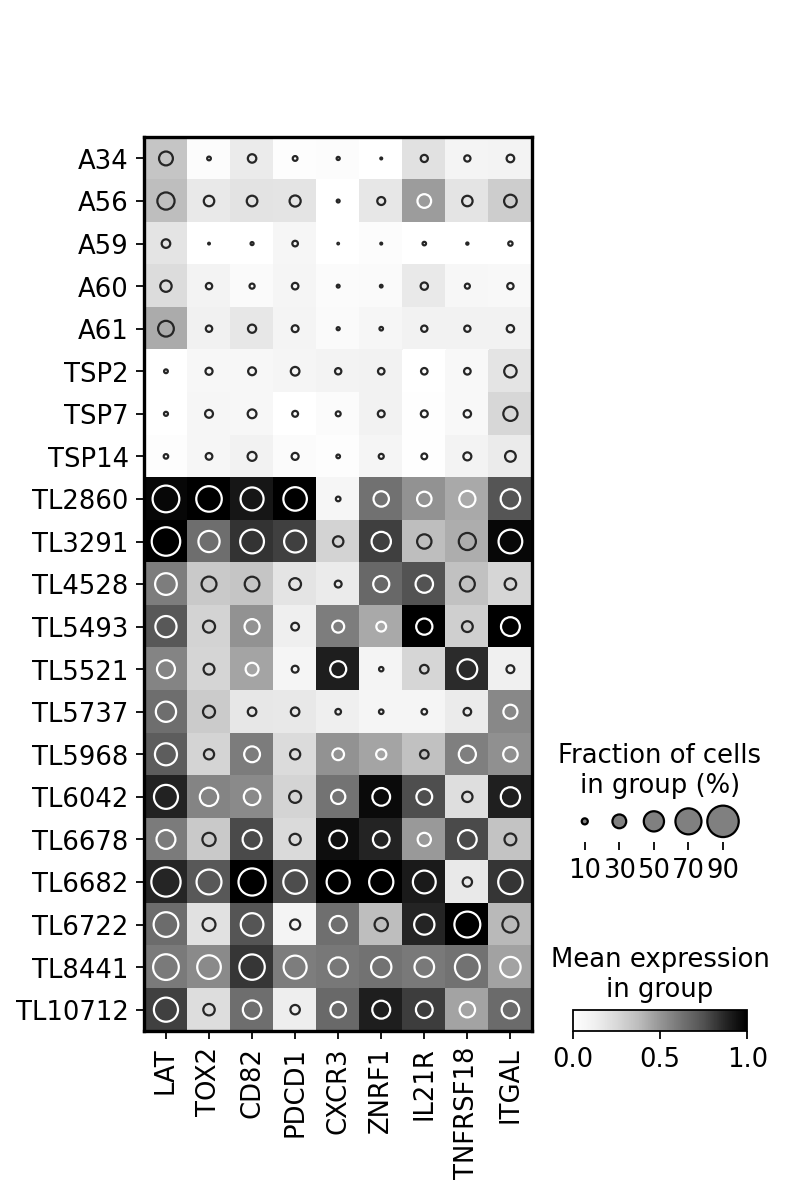

In [171]:
## Treg
sc.settings.set_figure_params(dpi=80, facecolor='white')
genes = ['LAT','TOX2','CD82','PDCD1','CXCR3','ZNRF1','IL21R',
         'TNFRSF18','ITGAL']

dp = sc.pl.dotplot(adata_sub, var_names=genes, groupby='donor',dendrogram=False,
                   var_group_rotation=0, swap_axes=False,standard_scale = 'var',
                   return_fig=True, categories_order = categories_order)
dp.style(cmap='Greys',color_on='square',dot_edge_color=None,dot_edge_lw=1)
dp.savefig('/home/jovyan/farm/T-cell_lym/script/figures/DEGs_LN_Treg.pdf')

In [183]:
adata_sub = adata_sub[~adata_sub.obs['donor'].isin(['TL_KLT','TL_MTK','TL_SJH03'])].copy() ### filter donors <20 cells

In [172]:
sc.tl.leiden(adata, resolution=1.0, key_added="leiden_1.0")

running Leiden clustering
    finished: found 28 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:01:35)


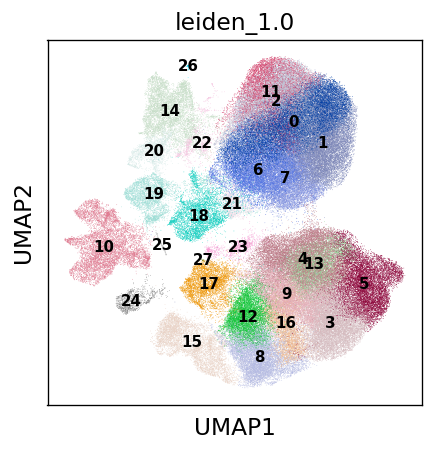

In [174]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pl.umap(adata, color = ['leiden_1.0'], legend_loc = "on data", legend_fontsize=9)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:10:50)


/home/jovyan/my-conda-envs/dandelion/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perf

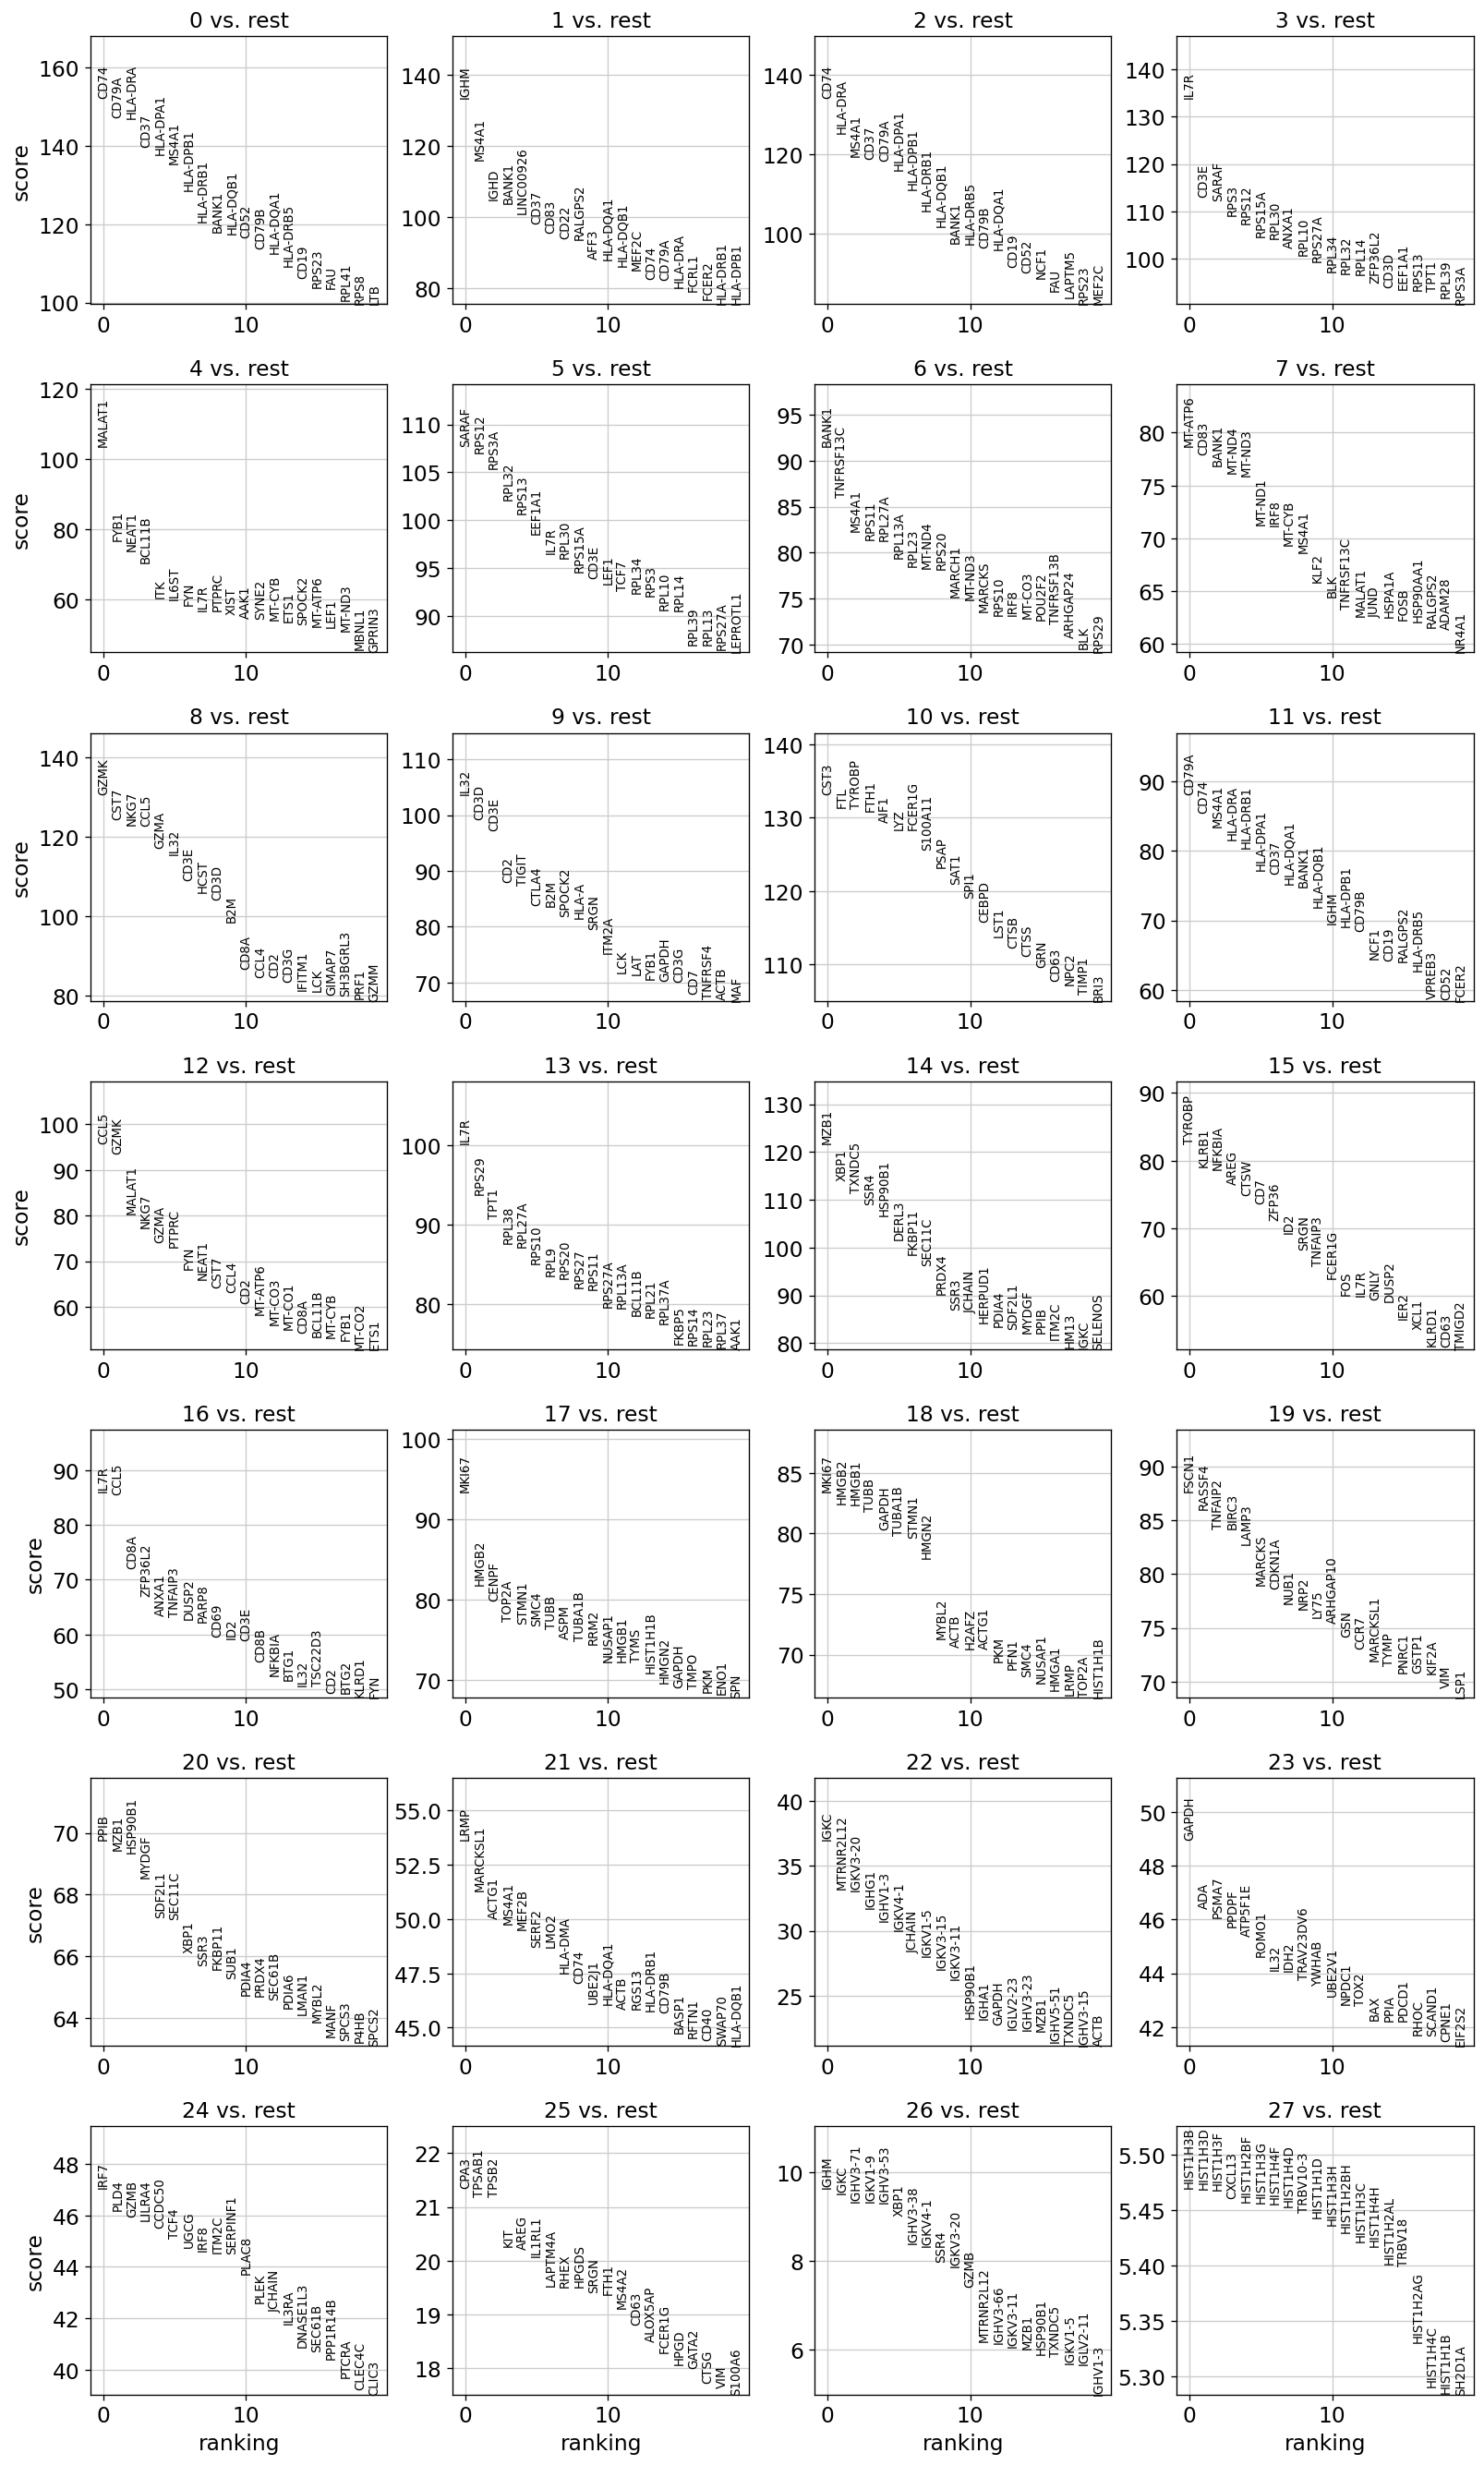

In [176]:
sc.tl.rank_genes_groups(adata, 'leiden_1.0', method = 'wilcoxon', n_genes = 200)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})